In [1]:
import math
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nPx = 201
D = 25.5
src    = ceo.Source("R",zenith=[10*ceo.constants.ARCMIN2RAD],azimuth=[0],
                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
gmt = ceo.GMT_MX(D,nPx)

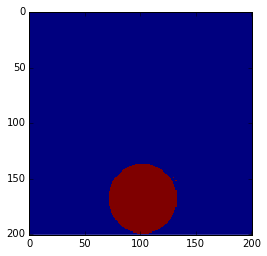

In [3]:
src.reset()
gmt.propagate(src)
pm = src.rays.piston_mask
#print pm.shape
imshow(np.reshape(pm[0][0,:],(nPx,nPx)),interpolation='none')

In [4]:
src.piston()

array([ -1.42972556e-06], dtype=float32)

In [5]:
src.piston(where='segments')

array([[  4.76411788e-06,  -4.68308235e-06,  -4.68308235e-06,
          4.76411424e-06,  -4.93273001e-06,  -4.93273092e-06,
         -1.59913711e-07]])

In [6]:
PS = ceo.SegmentPistonSensor(gmt,src)
src.reset()
gmt.propagate(src)
PS.P = src.rays.piston_mask
print PS.P

[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)]


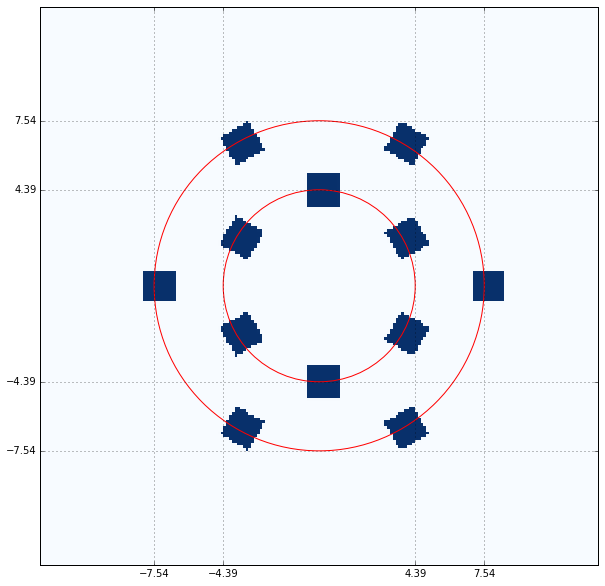

In [7]:
M = PS.M
R = D/2
rc = 4.387
rp = 7.543
fig,ax =subplots()
fig.set_size_inches((10,10))
ax.imshow(M[0].sum(axis=0).reshape((nPx,nPx)),extent=[-R,R,-R,R],interpolation='None',cmap='Blues',origin='lower')
#ax.imshow(M[7,:].reshape((n,n)),extent=[-R,R,-R,R],interpolation='None',cmap='Blues',origin='lower')
grid()
xticks([-rp,-rc,rc,rp])
yticks([-rp,-rc,rc,rp])
c1 = Circle((0,0),radius=rc, color='r', fill=False)
ax.add_patch(c1)
c2 = Circle((0,0),radius=rp, color='r', fill=False)
ax.add_patch(c2)

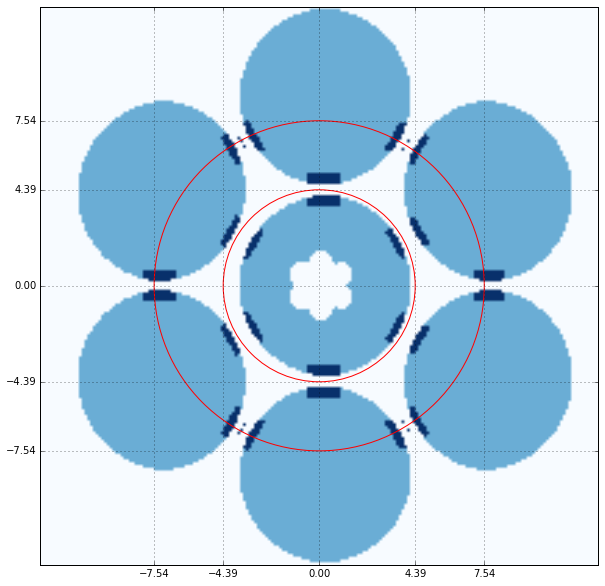

In [8]:
fig,ax =subplots()
fig.set_size_inches((10,10))
P = src.rays.piston_mask[0].sum(axis=0)
P = src.wavefront.amplitude.host()[0,:]
ax.imshow(P.reshape(nPx,nPx) + np.logical_and(P,M[0].sum(axis=0)).reshape(nPx,nPx),
          extent=[-R,R,-R,R],interpolation=None,cmap='Blues',origin='lower')
grid()
xticks([-rp,-rc,0,rc,rp])
yticks([-rp,-rc,0,rc,rp])
c1 = Circle((0,0),radius=rc, color='r', fill=False)
ax.add_patch(c1)
c2 = Circle((0,0),radius=rp, color='r', fill=False)
ax.add_patch(c2)

In [10]:
src.piston(where='segments')*1e9

array([[ 3501.3190427 , -2635.31910605, -2635.31546807,  3501.32268068,
        -2641.46706286, -2641.46706286,   -57.80909973]])

In [10]:
W = (PS.P[0] * np.array([arange(1,8)]).T**2).sum(axis=0)
W = np.tile(W,src.N_SRC)

<matplotlib.colorbar.Colorbar instance at 0x2aaeb825d560>

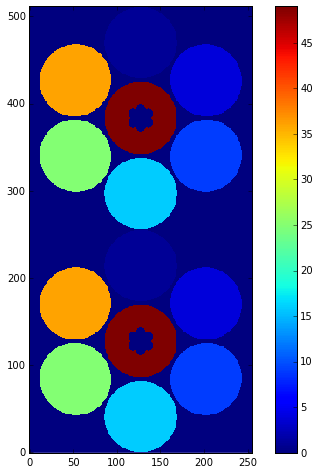

In [11]:
src.wavefront.reset(phase=ceo.cuFloatArray(host_data=W))
fig = figure()
fig.set_size_inches(8,8)
imshow(np.reshape(src.wavefront.phase.host(),(nPx*src.N_SRC,nPx)),interpolation='none',origin='lower')
colorbar()

In [12]:
p = PS.piston(src)
print p

[[  1.   4.   9.  16.  25.  36.  49.]
 [  1.   4.   9.  16.  25.  36.  49.]]


In [13]:
p = PS.piston(src,segment="edge")
print p

[[-48.  -3. -45.  -5. -40.  -7. -33.  -9. -24. -11. -13.  35.]
 [-48.  -3. -45.  -5. -40.  -7. -33.  -9. -24. -11. -13.  35.]]
